In [ ]:
import numpy as np
import matplotlib.pyplot as plt

def plot_saliency_3d(saliency_video, percentile, nr_instance, test_dates, mode="standard",cmap="magma"):
    """
    Crea uno scatter plot 3D dei pixel con saliency >= percentile specificato e imposta il titolo.
    """
    # Calcola i percentili frame per frame
    masks = []

    for t in range(saliency_video.shape[0]):
        frame_saliency = saliency_video[t, :, :]
        percentile_value = np.percentile(frame_saliency, percentile)
        
        if mode == "standard":
            masks.append(frame_saliency >= np.percentile(frame_saliency, percentile))
        elif mode == "to_zero":
            # Calcola quanti pixel corrispondono esattamente al bottom X%
            num_pixels = int(np.prod(frame_saliency.shape) * (percentile / 100))
    
            # Ottieni gli indici dei pixel con le saliency più basse
            flat_indices = np.argsort(frame_saliency.flatten())[:num_pixels]
    
            # Crea una maschera impostando a True solo i pixel nel bottom percentile
            mask = np.zeros_like(frame_saliency, dtype=bool)
            mask.flat[flat_indices] = True
    
            masks.append(mask)
        
    
    mask = np.stack(masks, axis=0)
    indices = np.argwhere(mask)

    # Estrai le coordinate e i valori di saliency
    xs = indices[:, 1] + 0.5
    ys = indices[:, 0]
    zs = indices[:, 2] + 0.5
    saliency_values = saliency_video[mask]

    # Normalizza l'alpha per evidenziare i valori alti
    alpha = np.clip(saliency_values / np.max(saliency_values), 0.05, 1)

    # Creazione figura
    fig = plt.figure(figsize=(12, 8))
    ax = fig.add_subplot(111, projection='3d')

    # Loop per scatter individuali con alpha personalizzato
    for x, y, z, saliency, a in zip(zs, ys, xs, saliency_values, alpha):
        ax.scatter(x, y, z, c=[saliency], cmap=cmap, marker='s',
                    s=500, vmin=np.min(saliency_values), vmax=np.max(saliency_values),
                    alpha=a)

    # Etichette assi
    ax.set_xlabel('Columns', fontsize=13, labelpad=10)
    ax.set_ylabel('Time steps', fontsize=13, labelpad=10)
    ax.set_zlabel('Rows', fontsize=13, labelpad=10)
    
    # Migliora i ticks
    ax.set_zticks(np.arange(0, 5, 1))
    ax.set_yticks(np.arange(0, 104, 20))
    ax.set_xticks(np.arange(0, 8, 1))
    
    # Limiti degli assi
    ax.set_xlim([0, 8])
    ax.set_ylim([0, 104])
    ax.set_zlim([0, 5])

    # Angolazione migliorata
    ax.view_init(elev=30, azim=-45)

    # Griglia meno invadente
    ax.grid(True, linestyle='--', linewidth=0.5, alpha=0.5)

    # Titolo dinamico
    instance_date = test_dates[nr_instance][0].astype(str).split('T')[0]
    ax.set_title(f"Saliency Video for Instance nr: {nr_instance}\nTarget Date: {instance_date}",
                 fontsize=16, fontweight='bold', pad=20)
    
    # Colorbar più compatta
    sm = plt.cm.ScalarMappable(cmap=cmap, norm=plt.Normalize(vmin=np.min(saliency_values), vmax=np.max(saliency_values)))
    sm.set_array([])
    cbar = plt.colorbar(sm, ax=ax, pad=0.1, aspect=20, shrink=0.7)
    cbar.set_label('Saliency Intensity', fontsize=12)
    cbar.ax.tick_params(labelsize=10)

    # Salva il plot
    #fig.savefig('/content/saliency_video_high_res.png', dpi=400, bbox_inches='tight')

    plt.show()


: 

In [2]:
import sys 

# Aggiungi il percorso della cartella XAI (risali di tre livelli dal notebook)
xai_path = os.path.abspath(os.path.join('..', '..', '..'))
sys.path.append(xai_path)

NameError: name 'os' is not defined

In [ ]:
from common import plots

import importlib

# Forza il reload del modulo
importlib.reload(plots)

<module 'common.plots' from '/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/common/plots.py'>

In [ ]:
import numpy as np
import os
import pickle

# IMPORTO I DATI PER VOTTIGNASCO

# Ottieni il percorso effettivo da una variabile d'ambiente
work_path = os.environ['WORK']  # Ottieni il valore della variabile d'ambiente WORK
v_test_OHE_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_month_OHE.npy"
v_test_image_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_normalized_image_sequences.npy"
v_test_target_dates_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_target_dates.npy"
v_test_images_dates = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/Vottignasco_00425010001_test_image_sequences_dates.npy"
v_test_normalization_factors_std_path  = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/normalization_factors/Vottignasco_00425010001_training_target_std.npy"
v_test_normalization_factors_mean_path = "/leonardo_work/try25_pellegrino/Water_Resources/rise-video/data/Vottignasco/normalization_factors/Vottignasco_00425010001_training_target_mean.npy"

# Carica l'array numpy dai file
vottignasco_test_OHE         = np.load(v_test_OHE_path)
vottignasco_test_image       = np.load(v_test_image_path)
vottignasco_test_dates       = np.load(v_test_target_dates_path)
vottignasco_test_image_dates = np.load(v_test_images_dates)
vott_target_test_std         = np.load(v_test_normalization_factors_std_path) 
vott_target_test_mean        = np.load(v_test_normalization_factors_mean_path)


print(len(vottignasco_test_dates))
print(len(vottignasco_test_image))
print(len(vottignasco_test_OHE))

105
105
105


In [ ]:
import pickle

path_to_load_results ="/leonardo_work/try25_pellegrino/Water_Resources/rise-video/XAI/spatial_temporal/results/01_marc_st_rise_total_setups/rise_st_original_result_setup_l_8_h2_w4_p_08.pkl"
# Salvataggio della lista results in un file pickle
with open(path_to_load_results, 'rb') as file:
  result_st = pickle.load(file)
  #result_st.append(setup)

In [ ]:
sal_video_0_s1 = result_st["saliency_videos"][0,0,:]

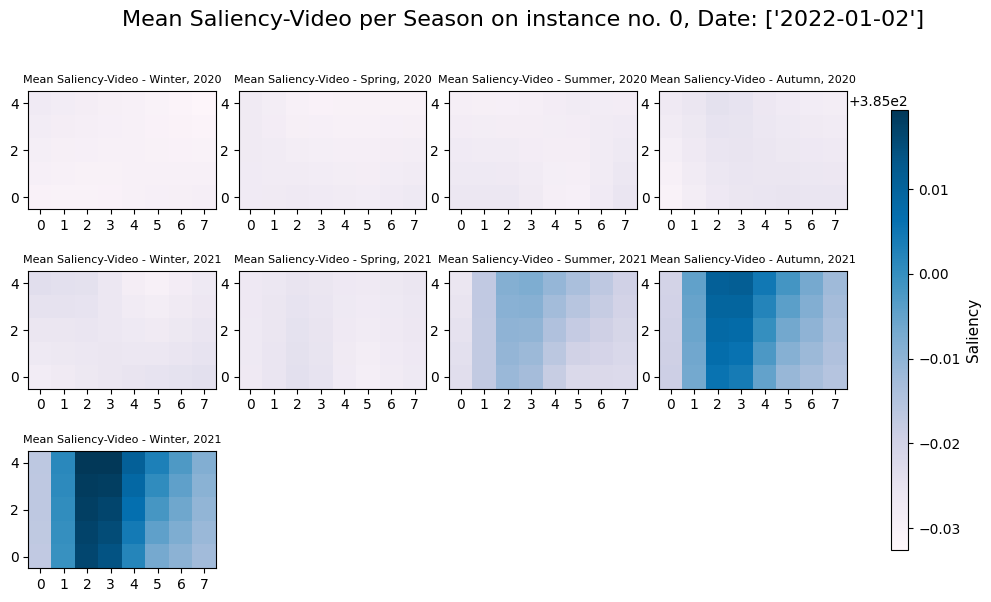

In [96]:
plots.plot_sv_mean_per_season(sal_video_0_s1, 0, vottignasco_test_dates, vottignasco_test_image_dates, cmap="PuBu")
plt.close()

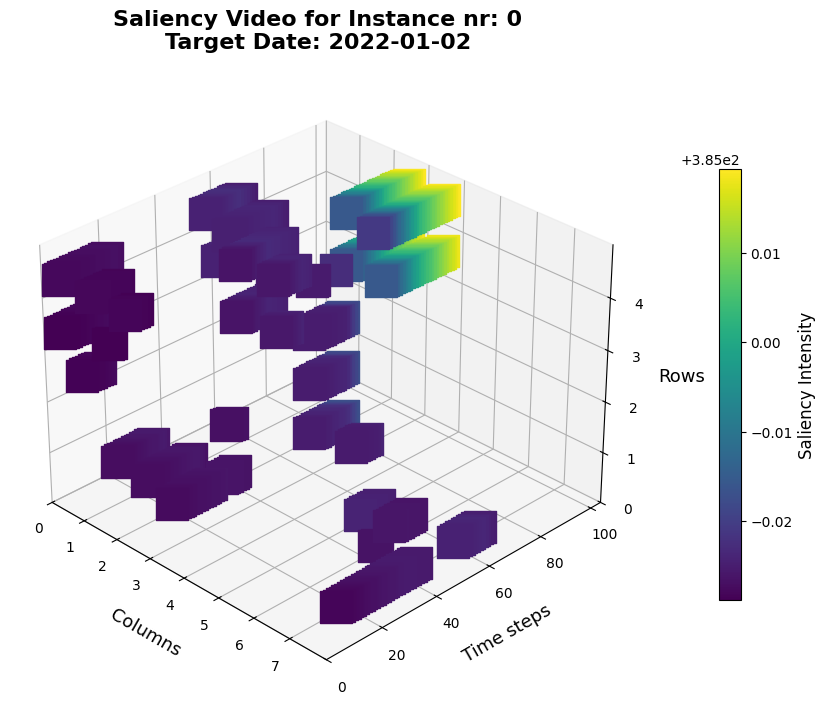

In [97]:
nr_instance = 0

saliency_video = sal_video_0_s1

percentile = 90

plot_saliency_3d(saliency_video, percentile, nr_instance, vottignasco_test_dates, mode="standard", cmap="viridis")
plt.close()

(104, 5, 8)


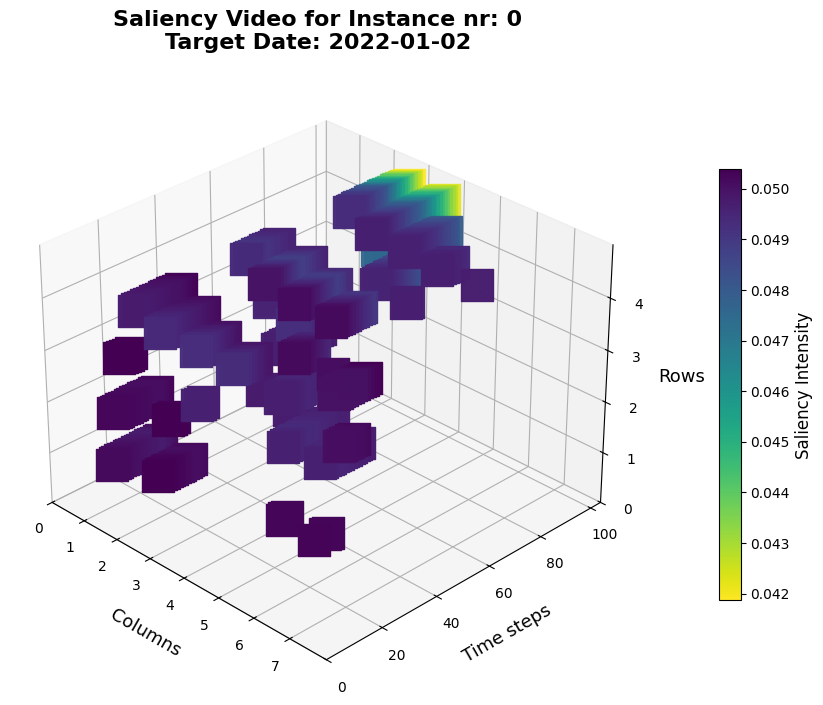

In [98]:
sal_video_0_s2 = result_st["saliency_videos"][0,1,:]

print(sal_video_0_s2.shape)

nr_instance = 0

saliency_video = sal_video_0_s2

percentile = 10

plot_saliency_3d(saliency_video, percentile, nr_instance, vottignasco_test_dates, mode="to_zero", cmap="viridis_r")
plt.close()

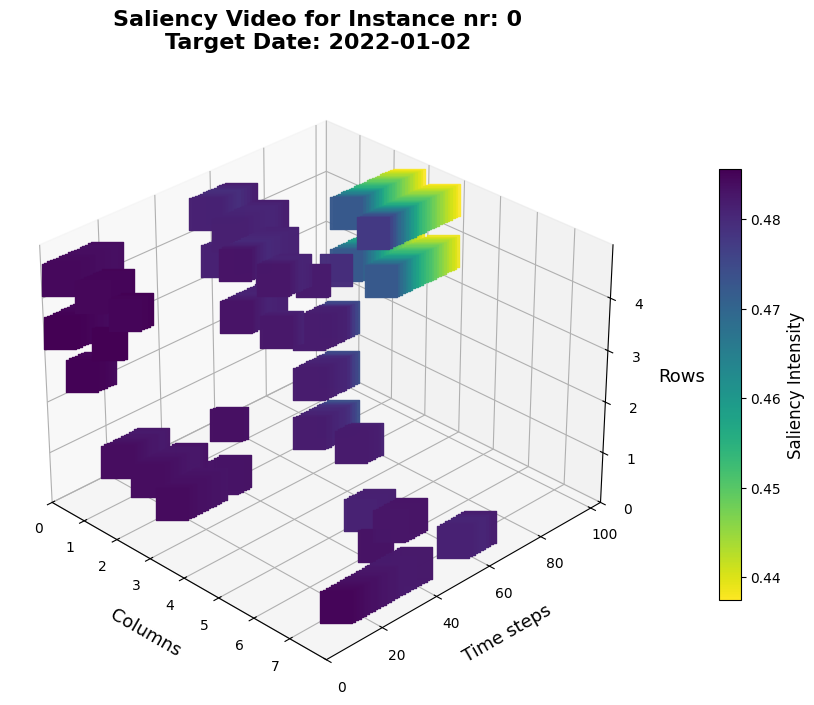

In [99]:
sal_video_0_s3 = result_st["saliency_videos"][0,2,:]

nr_instance = 0

saliency_video = sal_video_0_s3

percentile = 10

plot_saliency_3d(np.abs(saliency_video), percentile, nr_instance, vottignasco_test_dates, mode="to_zero", cmap="viridis_r")
plt.close()

(104, 5, 8)


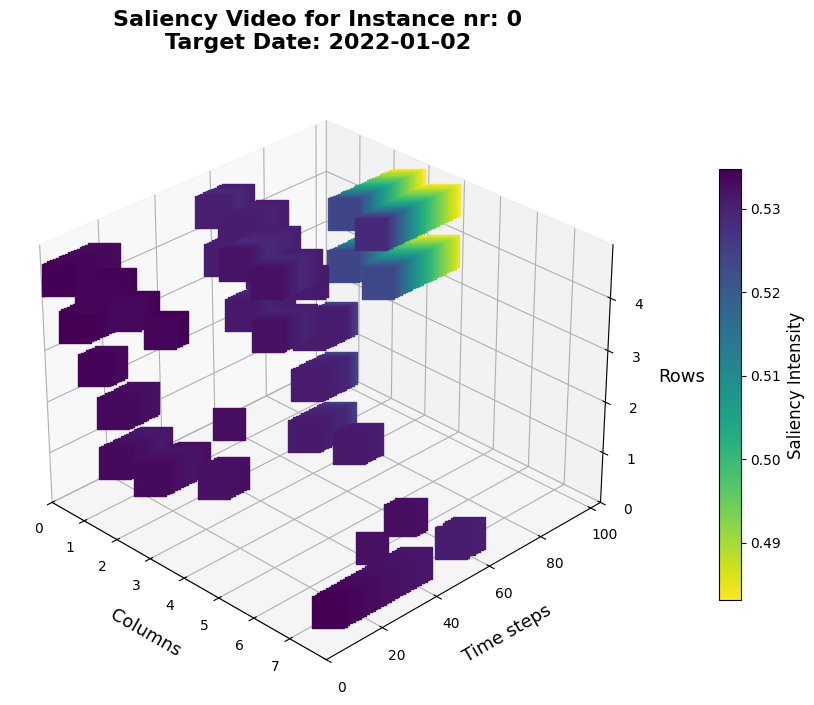

In [100]:
sal_video_0_s4 = result_st["saliency_videos"][0,3,:]

print(sal_video_0_s4.shape)

nr_instance = 0

saliency_video = sal_video_0_s4

percentile = 10

plot_saliency_3d(saliency_video, percentile, nr_instance, vottignasco_test_dates, mode="to_zero", cmap="viridis_r")
plt.close()